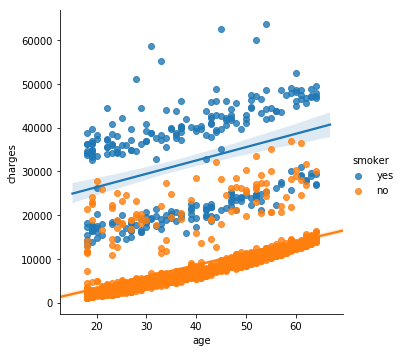

Hello there, please enter the following information about yourself, when asked.
What is your age?
20
What is your height (in centimeters)?
167
What is your weight (in kilograms)?
70
How many children do you have?
2
What is your gender? (M/F)
M
Do you smoke?
(1) Yes
(2) No
1
What is your region?
(1) North-East
(2) North-West
(3) South-East
(4) South-West
1
The estimated medical insurance you would need is $ 18676.02841529595 .


In [4]:

# author Varun Gogia


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/home/ubuntu/Desktop/Projects/Medical-Insurance-Estimator-master/data.csv')

sns.lmplot(x = 'age', y = 'charges', data = data, hue = 'smoker')
plt.show()

pdata = pd.get_dummies(data[['sex', 'smoker', 'region']])

pdata.drop(['sex_female', 'smoker_no', 'region_northeast'], axis = 1, inplace=True)

data.drop(['sex', 'smoker', 'region'], axis = 1, inplace=True)

mydat = pd.concat([data, pdata], axis = 1)

X = mydat.drop(['charges'], axis = 1)

y = mydat['charges']

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X, y)

print("Hello there, please enter the following information about yourself, when asked.")
print("What is your age?")
age = int(input())
print("What is your height (in centimeters)?")
height = int(input())
print("What is your weight (in kilograms)?")
weight = int(input())
print("How many children do you have?")
children = int(input())
print("What is your gender? (M/F)")
gender = input()
if gender == 'M':
    gender = 1
else:
    gender = 0
print("Do you smoke?\n(1) Yes\n(2) No")
smoke = int(input())
print("What is your region?\n(1) North-East\n(2) North-West\n(3) South-East\n(4) South-West")
region = input()
if region == '1':
    nw = 0
    se = 0
    sw = 0
elif region == '2':
    nw = 1
    se = 0
    sw = 0
elif region == '3':
    se = 1
    sw = 0
    nw = 0
else:
    sw = 1
    nw = 0
    se = 0
bmi = height/weight    
result = float(model.predict(np.reshape(np.array([age, bmi, children, gender, smoke, nw, se, sw]), (-1, 8))))

print('The estimated medical insurance you would need is $', result, '.')